# Plotting Figure 11
> Shape optimization for Kornilov case and Rijke Tube in one Figure

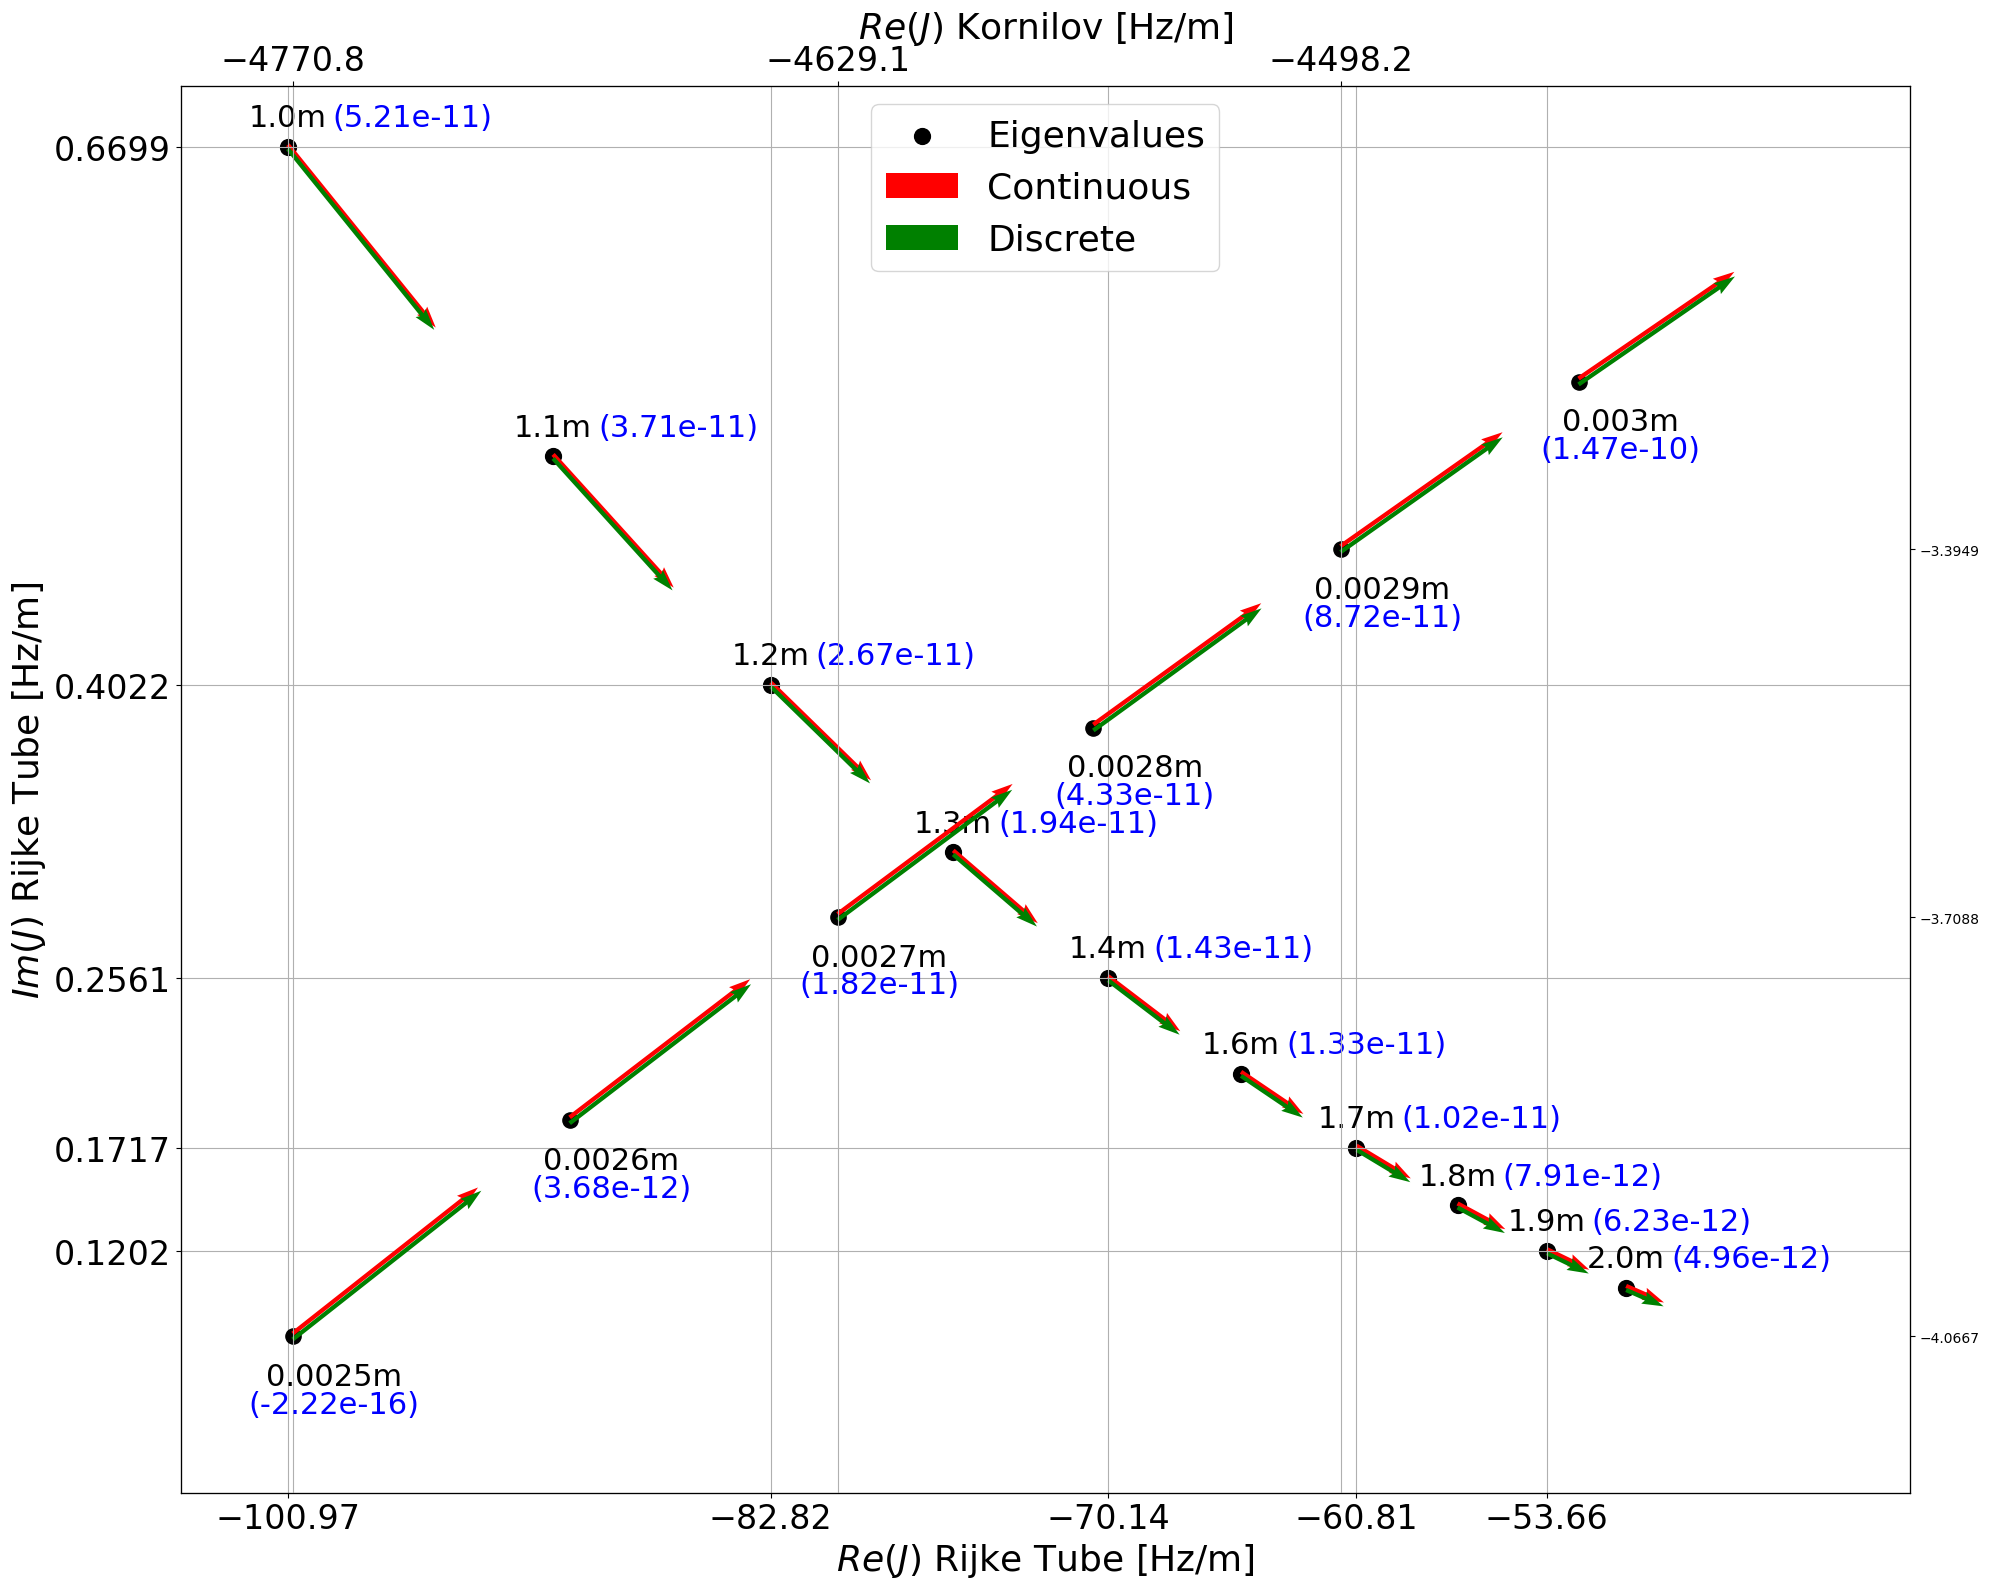

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

os.chdir(os.path.join(os.getcwd()))
file = os.path.join('data_fig3.txt')
# read file
with open(file, 'r') as f:
    lines = f.readlines()
# create empty lists to store the data
duct1 = []
eigenvalues1 = []
continuous1 = []
discrete1 = []
# read the data from the file
for line in lines[1:]: # skip the first line
    duc, eig, con, dis = line.strip().split(',')
    duct1.append(round(float(duc),1))
    eigenvalues1.append(complex(eig))
    continuous1.append(complex(con))
    discrete1.append(complex(dis))
# transform the lists into numpy arrays to perform operations
duct1 = np.array(duct1)
eigenvalues1 = np.array(eigenvalues1)
continuous1 = np.array(continuous1)
discrete1 = np.array(discrete1)

# Create a figure with a single subplot
fig, ax1 = plt.subplots(figsize=(20, 16))

# RIJKE TUBE
# Plot eigenvalues on the complex plane
ax1.scatter(eigenvalues1.real, eigenvalues1.imag, s=130 ,color='black', label='Eigenvalues')
# Add labels to each point
for i, txt in enumerate(duct1):
    ax1.annotate(f'{txt}m', (eigenvalues1[i].real, eigenvalues1[i].imag), fontsize=22,
                 textcoords="offset points", xytext=(0,15), ha='center')
    # Compute the scalar product between the two vectors from continuous and discrete
    scalar_product = np.vdot(continuous1[i], discrete1[i])
    cos_theta = np.real(scalar_product) / (np.linalg.norm(continuous1[i]) * np.linalg.norm(discrete1[i]))
    error = 1-cos_theta
    #print(f"{error:.4e}")
    #print("Scalar product (continuous · discrete):", cos_theta)
    ax1.annotate(f'({error:.2e})', (eigenvalues1[i].real, eigenvalues1[i].imag), fontsize=22,
                    textcoords="offset points", xytext=(90,15), ha='center', color='blue')

scale = 18
offset = 0.001
# Add arrows for continuous and discrete shape derivatives
for i in range(len(eigenvalues1)):
    ax1.quiver(eigenvalues1[i].real, eigenvalues1[i].imag+offset, continuous1[i].real/scale, continuous1[i].imag/scale,
               angles='xy', scale_units='xy', scale=1, color='red', label='Continuous' if i == 0 else "", width=0.0025)
    ax1.quiver(eigenvalues1[i].real, eigenvalues1[i].imag-offset, discrete1[i].real/scale, discrete1[i].imag/scale,
               angles='xy', scale_units='xy', scale=1, color='green', label='Discrete' if i == 0 else "", width=0.0025)
    #ax.arrow(eigenvalues[i].real, eigenvalues[i].imag, continuous[i].real/scale, continuous[i].imag/scale, head_width=0.01, head_length=1)
    #ax.arrow(eigenvalues[i].real, eigenvalues[i].imag, discrete[i].real/scale, discrete[i].imag/scale, head_width=0.01, head_length=1)

# Set the fontsize of the tick labels
ax1.tick_params(axis='both', which='major', labelsize=24)
# Set labels and title
ax1.set_xlabel(r'$Re(J)$ Rijke Tube [Hz/m]', fontsize=26)
ax1.set_ylabel(r'$Im(J)$ Rijke Tube [Hz/m]', fontsize=26)
ax1.legend(loc='upper center', fontsize=26)
ax1.grid(True)

ax1.set_ylim(0,0.7)
ax1.set_xlim(-105, -40)
ax1.set_xticks(eigenvalues1.real[::2])
ax1.set_yticks(eigenvalues1.imag[::2])





# KORNILOV
ax2 = ax1.twinx().twiny()  # shares same figure, creates new top+right axes

file = os.path.join('data_fig7.txt')
# read file
with open(file, 'r') as f:
    lines = f.readlines()
# create empty lists to store the data
duct2 = []
eigenvalues2 = []
continuous2 = []
discrete2 = []
# read the data from the file
for line in lines[1:]: # skip the first line
    duc, eig, con, dis = line.strip().split(',')
    duct2.append(round(float(duc),5))
    eigenvalues2.append(complex(eig))
    continuous2.append(complex(con))
    discrete2.append(complex(dis))
# take every 2nd entry from the lists
duct2 = np.array(duct2[::2])
eigenvalues2 = np.array(eigenvalues2[::2])
continuous2 = np.array(continuous2[::2])
discrete2 = np.array(discrete2[::2])

# Plot eigenvalues on the complex plane
ax2.scatter(eigenvalues2.real, eigenvalues2.imag, s=120 ,color='black', label='Eigenvalues')
# Add labels to each point
for i, txt in enumerate(duct2):
    ax2.annotate(f'{txt}m', (eigenvalues2[i].real, eigenvalues2[i].imag), fontsize=22,
                 textcoords="offset points", xytext=(30,-35), ha='center')
    # Compute the scalar product between the two vectors from continuous and discrete
    scalar_product = np.vdot(continuous2[i], discrete2[i])
    cos_theta = np.real(scalar_product) / (np.linalg.norm(continuous2[i]) * np.linalg.norm(discrete2[i]))
    error = 1-cos_theta
    #print(f"{error:.4e}")
    #print("Scalar product (continuous · discrete):", cos_theta)
    ax2.annotate(f'({error:.2e})', (eigenvalues2[i].real, eigenvalues2[i].imag), fontsize=22,
                    textcoords="offset points", xytext=(30,-55), ha='center', color='blue')

scale = 15000
offset = 0.0025
# Add arrows for continuous and discrete shape derivatives
for i in range(len(eigenvalues2)):
    ax2.quiver(eigenvalues2[i].real, eigenvalues2[i].imag+offset, continuous2[i].real/scale, continuous2[i].imag/scale,
               angles='xy', scale_units='xy', scale=1, color='red', label='Continuous' if i == 0 else "", width=0.0025)
    ax2.quiver(eigenvalues2[i].real, eigenvalues2[i].imag-offset, discrete2[i].real/scale, discrete2[i].imag/scale,
               angles='xy', scale_units='xy', scale=1, color='green', label='Discrete' if i == 0 else "", width=0.0025)
    #ax.arrow(eigenvalues[i].real, eigenvalues[i].imag, continuous[i].real/scale, continuous[i].imag/scale, head_width=0.01, head_length=1)
    #ax.arrow(eigenvalues[i].real, eigenvalues[i].imag, discrete[i].real/scale, discrete[i].imag/scale, head_width=0.01, head_length=1)

# Set the fontsize of the tick labels
ax2.tick_params(axis='both',which='major', labelsize=24)
ax2.tick_params(axis='y', labelsize=24)
# Set labels and title
ax2.set_xlabel(r'$Re(J)$ Kornilov [Hz/m]', fontsize=26)
ax2.set_ylabel(r'$Im(J)$ Kornilov [Hz/m]', fontsize=26)
ax2.grid(True)
ax2.set_xlim([-4800, -4350])
ax2.set_ylim([-4.2,-3])
ax2.set_xticks(eigenvalues2.real[::2])
ax2.set_yticks(eigenvalues2.imag[::2])


# Adjust layout
plt.tight_layout()
plt.show()

# Save the figure to the 'Images/' folder
fig.savefig(os.path.join('Images/', 'Fig11.png'))
